First few rows of the dataset:
      0  1         2      3    4  5  6
0  1749  1  1749.042   96.7 -1.0 -1  1
1  1749  2  1749.123  104.3 -1.0 -1  1
2  1749  3  1749.204  116.7 -1.0 -1  1
3  1749  4  1749.288   92.8 -1.0 -1  1
4  1749  5  1749.371  141.7 -1.0 -1  1
Number of columns in the dataset: 7


21:29:16 - cmdstanpy - INFO - Chain [1] start processing
21:29:16 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


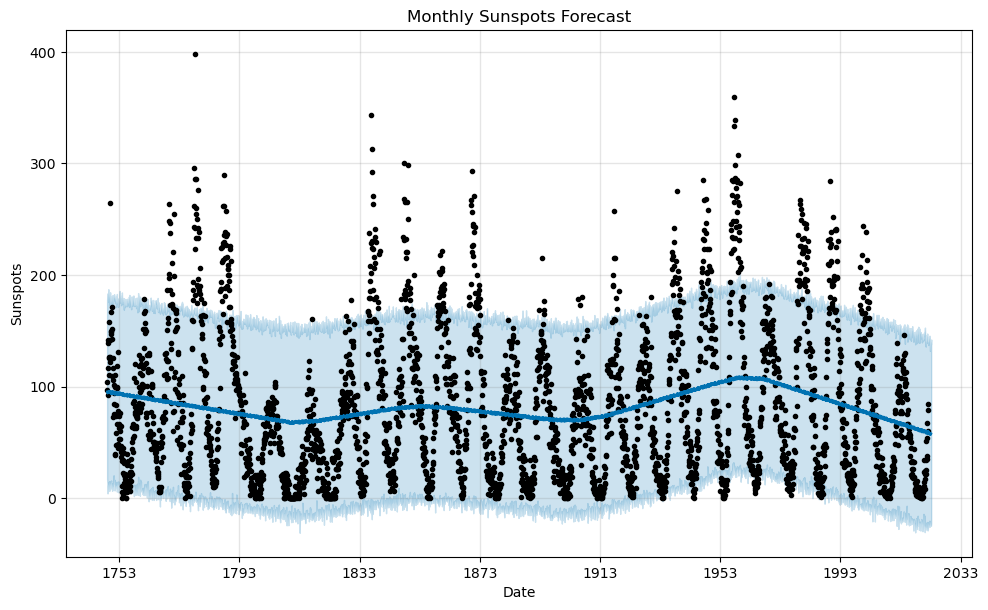

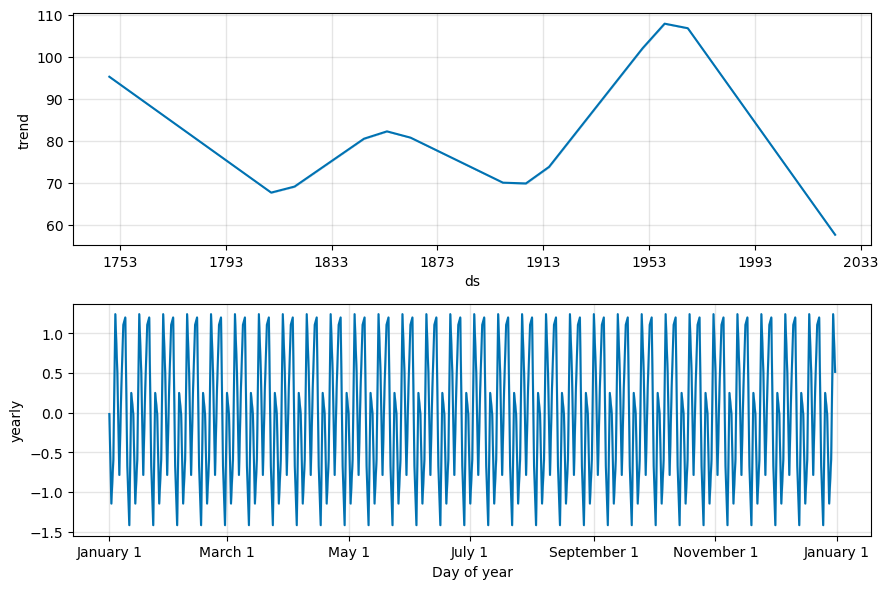

Monthly Data - Mean Absolute Error (MAE): 53.3027443157509
Monthly Data - R² Score: 0.06548493193477534


In [2]:
# Step 1: Import Required Libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Step 2: Load the Monthly Data
monthly_data = pd.read_csv('SN_m_tot_V2.0.csv', sep=';', header=None)

# Step 3: Check Data Structure and Adjust Column Names
print("First few rows of the dataset:")
print(monthly_data.head())
print(f"Number of columns in the dataset: {monthly_data.shape[1]}")

monthly_data.columns = ['Year', 'Month', 'Day', 'Mean_Sunspot_Count', 'Std_Deviation', 'Num_Observations', 'Indicator']

# Step 4: Preprocess Data to Fit Prophet Requirements
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(Day=1), errors='coerce')

# Drop rows with invalid dates and keep only relevant columns
monthly_data = monthly_data.dropna(subset=['Date'])
monthly_data = monthly_data[['Date', 'Mean_Sunspot_Count']]
monthly_data = monthly_data.rename(columns={'Date': 'ds', 'Mean_Sunspot_Count': 'y'})

# Step 5: Train the Prophet Model
monthly_model = Prophet(growth='linear')

monthly_model.add_seasonality(name='yearly', period=12, fourier_order=5)

monthly_model.fit(monthly_data)

# Step 6: Make Future Predictions
future_months = monthly_model.make_future_dataframe(periods=12, freq='M')

# Predict future sunspots
monthly_forecast = monthly_model.predict(future_months)

# Step 7: Visualize the Forecast
monthly_model.plot(monthly_forecast)
plt.title('Monthly Sunspots Forecast')
plt.xlabel('Date')
plt.ylabel('Sunspots')
plt.show()

monthly_model.plot_components(monthly_forecast)
plt.show()

# Step 8: Evaluate the Model
actual_monthly = monthly_data['y']
predicted_monthly = monthly_forecast['yhat'][:len(actual_monthly)]  # Truncate to match actual length
    
mae_monthly = mean_absolute_error(actual_monthly, predicted_monthly)
r2_monthly = r2_score(actual_monthly, predicted_monthly)

print(f'Monthly Data - Mean Absolute Error (MAE): {mae_monthly}')
print(f'Monthly Data - R² Score: {r2_monthly}')
